## import Modules

In [1]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

## load data

In [2]:
faults = pd.read_csv('dataset/dataset/faults_mini.csv')

---

# Process

1. 데이터의 특징 확인 : 전체 데이터의 독립 변수와 종속 변수, 행과 열 확인
    - 기초 통계
2. Data Normalization
    - Min-Max Normalization
    - $x_{new} = \frac{x-x_{min}}{x_{max} - x_{min}}$
3. 학습 및 테스트 데이터 분류
    - 학습 데이터 비율, MiniBatch size, Epoch 횟수 설정
    - 전체 데이터 개수만큼의 인덱스 생성하고 무작위로 shuffle
    - 인덱스를 활용한 학습 및 테스트 데이터 분류 
4. Foward and Back Propagation : `tf`
    - 신경망 모델 설계
    - 학습 방식 및 최적화 방식 설정

## 1. 데이터의 특징 확인

In [3]:
# 불량품에 대한 데이터
display(faults.head())

# 불량품의 종류를 0과 1로 나타낸다 [:-3]

,X_Minimum,Y_Minimum,Pixels_Areas,Steel_Plate_Thickness,Pastry,Z_Scratch,K_Scatch
0,42,270900,267,80,1,0,0
1,1084,185575,108,40,0,0,1
2,1109,1170194,130,175,0,1,0
3,190,210936,132,150,1,0,0
4,330,429227,264,150,1,0,0


In [4]:
# 통계값 확인
display(faults.describe())

,X_Minimum,Y_Minimum,Pixels_Areas,Steel_Plate_Thickness,Pastry,Z_Scratch,K_Scatch
count,10.000000,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000
mean,336.800000,4.980733e+05,1102.300000,96.500000,0.400000,0.300000,0.300000
std,419.946769,3.014717e+05,1591.202973,53.750969,0.516398,0.483046,0.483046
min,42.000000,1.855750e+05,108.000000,40.000000,0.000000,0.000000,0.000000
25%,48.750000,2.948952e+05,133.750000,47.500000,0.000000,0.000000,0.000000
50%,132.000000,4.033820e+05,265.500000,75.000000,0.000000,0.000000,0.000000
75%,380.250000,5.998238e+05,1240.500000,150.000000,1.000000,0.750000,0.750000
max,1109.000000,1.170194e+06,4048.000000,175.000000,1.000000,1.000000,1.000000


## 2. Normalization

**Min-Max Normalization**

- 최소값과 최대값이 너무 작거나 큰 값이다.
    - Pixels_Area 의 최대값과 최소값의 편차가 크다.
    - 무슨 상관인가? : 편차가 큰 데이터가 다른 데이터에 지나친 영향력을 끼친다. (잡아먹는다.)
    - 어떻게 해야 하는가? : 범위를 맞춰야 한다. `==` Min-Max Normalization
    
- Min-Max Normalization? :
    $$x_{new} = \frac{x-x_{min}}{x_{max} - x_{min}}$$ 
    - 이 방식의 문제?
        - outlier 이상치에 영향을 너무 크게 미친다.
        - 이상치가 없을 때 분포가 균일하게 이루어지지만 이상치가 **있을 때** 한 곳에 **몰리는 현상**이 발생한다.
    - 극복 방법?
        - 이상치를 제거 또는 대체한다.
        - 다른 정규화 기법을 사용한다. => `Z-score Normalization` 

### 이상치가 있는 정규화 실습 : 변수 생성 

In [5]:
# create variable
var_x = np.random.randint(0, 7, size = 99)      # 99개 멀쩡한 데이터를 뽑고
var_x_outlier = [100]   # 1개의 이상치를 생성한다.

# 변수가 두개이므로 합친다 : hstack()
var_x = np.hstack([var_x, var_x_outlier])
var_y = np.random.randint(0, 40, size = 100)

In [6]:
# check : create variable
print(f"var_x\n{var_x}\n")
print(f"var_y\n{var_y}")

var_x
[  6   6   1   0   2   4   2   5   0   2   5   6   6   5   3   6   5   5
   0   2   4   0   5   4   2   1   3   0   3   3   4   6   3   3   2   2
   3   5   4   4   3   5   4   5   1   1   1   6   4   1   3   3   3   0
   5   6   0   2   2   1   1   2   0   6   0   4   5   1   5   5   3   0
   1   6   3   2   5   2   1   0   6   3   4   5   2   5   3   5   0   6
   3   3   4   1   6   3   0   0   6 100]

var_y
[27  0 37 28 38 21 28 23 15  4 21  8  4 25 34 19 31 13 17  0 34 28 21 32
 32 18 19 18  2 38 21  8 25 33 37 18  0 21 32 24 38  6 16 18 22  0 29  8
 35 28 15 10  9 10 31 27  1 26 26 15  7 30 22 27  9 34 17 30  4 25 23 39
 23  6 14 26 33  2 16 28 20  2  9 16 22 29  7 26  6  9 17 39 23 25 26 11
 25 10 33 39]


In [7]:
# min max normalization
var_x_norm = (var_x - var_x.min())/(var_x.max() - var_x.min())
var_y_norm = (var_y - var_y.min())/(var_y.max() - var_y.min())

In [8]:
# check : min max normalization
print(f"var_x_norm\n{var_x_norm}\n")
print(f"var_y_norm\n{var_y_norm}")

var_x_norm
[0.06 0.06 0.01 0.   0.02 0.04 0.02 0.05 0.   0.02 0.05 0.06 0.06 0.05
 0.03 0.06 0.05 0.05 0.   0.02 0.04 0.   0.05 0.04 0.02 0.01 0.03 0.
 0.03 0.03 0.04 0.06 0.03 0.03 0.02 0.02 0.03 0.05 0.04 0.04 0.03 0.05
 0.04 0.05 0.01 0.01 0.01 0.06 0.04 0.01 0.03 0.03 0.03 0.   0.05 0.06
 0.   0.02 0.02 0.01 0.01 0.02 0.   0.06 0.   0.04 0.05 0.01 0.05 0.05
 0.03 0.   0.01 0.06 0.03 0.02 0.05 0.02 0.01 0.   0.06 0.03 0.04 0.05
 0.02 0.05 0.03 0.05 0.   0.06 0.03 0.03 0.04 0.01 0.06 0.03 0.   0.
 0.06 1.  ]

var_y_norm
[0.69230769 0.         0.94871795 0.71794872 0.97435897 0.53846154
 0.71794872 0.58974359 0.38461538 0.1025641  0.53846154 0.20512821
 0.1025641  0.64102564 0.87179487 0.48717949 0.79487179 0.33333333
 0.43589744 0.         0.87179487 0.71794872 0.53846154 0.82051282
 0.82051282 0.46153846 0.48717949 0.46153846 0.05128205 0.97435897
 0.53846154 0.20512821 0.64102564 0.84615385 0.94871795 0.46153846
 0.         0.53846154 0.82051282 0.61538462 0.97435897 0.15384615
 0.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


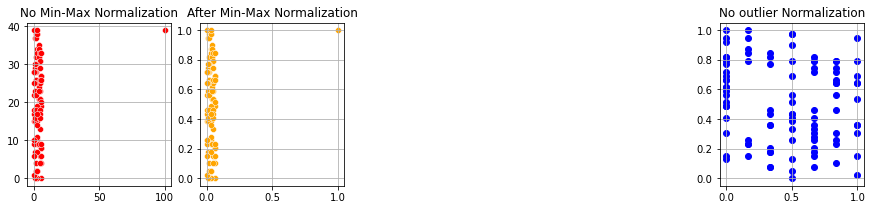

In [9]:
# visualization : min max nomralization

# figure size
plt.figure(figsize=(15,3))

# before
plt.subplot(1, 5, 1)    # 1행 5열 중에서 첫번째 그림부터 그리겠다.
sns.scatterplot(var_x, var_y, color='red')
plt.title('No Min-Max Normalization')
plt.grid()  # 격자

# after 
plt.subplot(1, 5, 2)
sns.scatterplot(var_x_norm, var_y_norm, color='orange')
plt.title('After Min-Max Normalization')
plt.grid()

# no outlier
# create data 
var_x_sound = np.random.randint(0, 7, size=100)
var_y_sound = np.random.randint(0, 40, size=100)
var_x_norm_sound, var_y_norm_sound = (var_x_sound - var_x_sound.min())/(var_x_sound.max() - var_x_sound.min()), (var_y_sound - var_y.min())/(var_y_sound.max() - var_y_sound.min())
# visualization
plt.subplot(1, 5, 5)
plt.scatter(var_x_norm_sound, var_y_norm_sound, color="blue")
plt.title("No outlier Normalization")
plt.grid()

y값은 정규화가 잘 되었으나 이상치가 있는 x값은 정규화가 잘 되지 않은 것을 확인 할 수 있다.

### 실제 데이터 정규화 실습

In [10]:
faults_norm = (faults - faults.min()) / (faults.max() - faults.min()) 
display(faults_norm.describe())

,X_Minimum,Y_Minimum,Pixels_Areas,Steel_Plate_Thickness,Pastry,Z_Scratch,K_Scatch
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.276289,0.317380,0.252360,0.418519,0.400000,0.300000,0.300000
std,0.393577,0.306181,0.403859,0.398155,0.516398,0.483046,0.483046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006326,0.111028,0.006536,0.055556,0.000000,0.000000,0.000000
50%,0.084349,0.221209,0.039975,0.259259,0.000000,0.000000,0.000000
75%,0.317010,0.420720,0.287437,0.814815,1.000000,0.750000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


최대값이 1로 통일 된 것을 `describe()` 에서 확인 할 수 있다.

## 3. 학습 및 테스트 데이터 분류

### 데이터를 섞기
학습률을 높이기 위함

In [11]:
# frac = 1 : 전체를 의미 (100%)

print(faults_norm[:5])
faults_shuffle = faults_norm.sample(frac = 1)
print("-------------------------"*3)
print(faults_shuffle[:5])

   X_Minimum  Y_Minimum  Pixels_Areas  Steel_Plate_Thickness  Pastry  \
0   0.000000   0.086658      0.040355               0.296296     1.0   
1   0.976570   0.000000      0.000000               0.000000     0.0   
2   1.000000   1.000000      0.005584               1.000000     0.0   
3   0.138707   0.025757      0.006091               0.814815     1.0   
4   0.269916   0.247458      0.039594               0.814815     1.0   

   Z_Scratch  K_Scatch  
0        0.0       0.0  
1        0.0       1.0  
2        1.0       0.0  
3        0.0       0.0  
4        0.0       0.0  
---------------------------------------------------------------------------
   X_Minimum  Y_Minimum  Pixels_Areas  Steel_Plate_Thickness  Pastry  \
9   0.005623   0.194961      0.984010               0.000000     0.0   
5   0.029991   0.602841      0.354822               0.814815     1.0   
2   1.000000   1.000000      0.005584               1.000000     0.0   
1   0.976570   0.000000      0.000000               0

In [12]:
# 분류에 용이한 넘파이로 변경

faults_np = faults_shuffle.to_numpy()
print(type(faults_np))

<class 'numpy.ndarray'>


### train set, test set 분류

In [13]:
train_ratio = 0.8
input_cnt   = 4 
output_cnt  = 3

In [14]:
# 전체 학습 데이터의 개수 파악
train_idx = int(len(faults_np) * train_ratio)
print(f"train_idx : {train_ratio}")     # 총 10개 중에 80%만 사용하겠다.

train_idx : 0.8


In [15]:
# 학습 데이터만 가져오기 위함 (이미 섞었으므로 다시 섞을 필요 없다.)
# train의 X와 Y는 행은 동일하되 다른 열을 가져오고
train_X, train_Y    = faults_np[:train_idx, :-output_cnt], faults_np[:train_idx, -output_cnt:]
# test의 X와 Y는 행이 달라지고 열은 train의 X, Y와 비슷한 방식으로 가져온다.
test_X, test_Y      = faults_np[train_idx:, :-output_cnt], faults_np[train_idx:, -output_cnt:]

print("train_X.shape : ", train_X.shape)
print("train_Y.shape : ", train_Y.shape)
print("------------"*2)
print("test_X.shape : ", test_X.shape)
print("test_Y.shape : ", test_Y.shape)

train_X.shape :  (8, 4)
train_Y.shape :  (8, 3)
------------------------
test_X.shape :  (2, 4)
test_Y.shape :  (2, 3)


## 4. Foward and Back Propagation 

<img alt='modeling guide' src=img/faults_model_guide.png width = 800>

1. Layer : Softmax, 다중분류 문제를 풀 때 마지막에 오는 활성화 함수
    - softmax : 확률 값을 출력한다.
    - y1이 될 확률값과 y2가 갖는 확률값 $\cdots$ yn이 가질 확률값을 출력하기 때문에 마지막에 Softmax를 쓴다?
    - 다중분류는 보통 softmax를 쓰고 softmax는 각 레이어들의 출력값의 합이 1이 되도록 만드는 함수다.
2. Cross Entropy : 다중분류에서 사용할 수 있는 손실함수
    - lost function : mse 같은건 다중분류에서 쓸 수 없다 (only 이진분류) 
3. Optimizer : 학습을 어떻게 최적화 시킬 것인가 == Adam
    - 성능이 가장 좋다고 알려짐.
4. total params : 총 15개
    - 왜? : weight 12개 + bias 3개

- 전부 연결되어있는데 이렇게 모두 연결된 계층을 : 완전 연결 계층이라고 한다. (Fully connected layer)

신경망 모델에도 이름이 있다. (ex: google net / 이미지 분류 모델 우승)  
이름은 붙이기 나름

In [16]:
simple_layer_model = tf.keras.Sequential([
    # layer를 쌓는다. 
    tf.keras.layers.Dense(units=3, 
    activation = 'softmax',   # 확률값을 밖으로 꺼낸다 : 활성화 함수의 목적
    input_shape = (4,)  # 입력값을 넣는 방법?
    )
 ])

In [17]:
# 모델 구조 확인 : summary()
simple_layer_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


`simple_layer_model.summary()`

```
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense (Dense)                (None, 3)                 15        
=================================================================
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
```

왜 Trainable, Non-trainable로 나누는가?
- 이후에 다른 사람이 만든 신경망 구조를 만들게 된다.
- 다른 사람이 만든 신경망 구조? : 나름의 데이터를 기반으로 만들었음
- 따라서 미리 설정해둔 파라미터를 건드리지 않고 내가 학습시키고 싶은 데이터로 구성된 레이어를 하나 추가하게 된다.
- 이걸 확인할 수 있는게 Trainable, Non-trainable params.
    - 아마도 Non-trainable이 미리 설정해둔 파라미터

In [18]:
simple_layer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                            loss = 'categorical_crossentropy'     # 다중 분류는 그냥 cross entropy가 아니라 categorical~ 이다.
                            )

In [19]:
# 학습을 직접 시킨다. (history를 저장할 수 있다.)

history_1 =simple_layer_model.fit(train_X, train_Y, 
                                    epochs=25, batch_size=2)

Epoch 1/25
4/4 [==============================] - 0s 664us/step - loss: 1.2430
Epoch 2/25
4/4 [==============================] - 0s 333us/step - loss: 1.2393
Epoch 3/25
4/4 [==============================] - 0s 665us/step - loss: 1.2359
Epoch 4/25
4/4 [==============================] - 0s 997us/step - loss: 1.2335
Epoch 5/25
4/4 [==============================] - 0s 665us/step - loss: 1.2303
Epoch 6/25
4/4 [==============================] - 0s 332us/step - loss: 1.2278
Epoch 7/25
4/4 [==============================] - 0s 333us/step - loss: 1.2249
Epoch 8/25
4/4 [==============================] - 0s 665us/step - loss: 1.2223
Epoch 9/25
4/4 [==============================] - 0s 665us/step - loss: 1.2195
Epoch 10/25
4/4 [==============================] - 0s 665us/step - loss: 1.2168
Epoch 11/25
4/4 [==============================] - 0s 665us/step - loss: 1.2144
Epoch 12/25
4/4 [==============================] - 0s 665us/step - loss: 1.2118
Epoch 13/25
4/4 [==============================] 

In [20]:
# 평가
#  Epoch 25/25
# 4/4 [==============================] - 0s 997us/step - loss: 1.3482

simple_layer_model.evaluate(test_X, test_Y)

# 기존의 학습데이터 돌린 성능보단 높게 나온다.

1/1 [==============================] - 0s 82ms/step - loss: 1.1532


1.1531915664672852

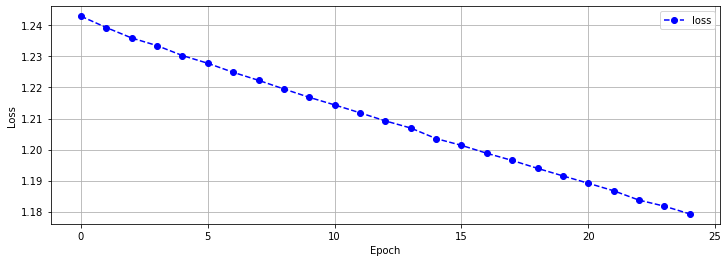

In [21]:
# loss가 줄고 있는 것 같은데 잘 모르겠다 => loss 시각화

plt.figure(figsize=(12,4))
plt.plot(history_1.history['loss'], 'b--o', label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [22]:
# 예측을 잘 했는지 확인 할 수 있는 함수 : predict

pred_Y = simple_layer_model.predict(test_X)     # x는 넣을 필요 없다.
print("pred_Y \n", pred_Y)



# pred_Y 
#  [[0.43986318 0.19298926 0.3671476 ]
#  [0.09996218 0.38383865 0.5161992 ]]


pred_Y 
 [[0.43986318 0.19298926 0.3671476 ]
 [0.09996218 0.38383865 0.5161992 ]]


In [23]:
# 왜 세개씩 두 쌍이 나오나?
# 이 세가지의 합을 모두 합치면 1이 된다.
print("\npred_Y[0] sum : ", sum(pred_Y[0][:]))

# pred_Y[0] sum :  1.0000000298023224



pred_Y[0] sum :  1.0000000298023224


In [24]:
# 가장 큰 값은?

pred_Y = np.argmax(pred_Y, axis = 1)     # axis = 1 : x축
print("pred_Y : ", pred_Y)

# pred_Y :  [0 2]

pred_Y :  [0 2]


In [25]:
# 실제 Y?

label_Y = np.argmax(test_Y, axis=1)
print("label_Y : ", label_Y)

# label_Y :  [1 2]

label_Y :  [1 2]


In [26]:
# 비교 : np.equal()

np.equal(pred_Y, label_Y)

# array([False,  True])

array([False,  True])

True = 1, Fale = 0 이므로 맞췄는지 아닌지를 수치화 할 수 있다.

In [27]:
acc = np.mean(np.equal(pred_Y, label_Y))
print(f"ACC : {acc*100}%")

ACC : 50.0%


### Accuracy를 높이기 위해 할 수 있는 방법

1. hidden layer를 깊게 쌓는다.  
or
2. 데이터를 많이 넣는다.  
or
3. learning rate를 바꾼다.  
or
4. optimizer를 바꿔본다.  
or 
5. epoch를 변경한다. (키운다)  
or 
6. 활성화 함수를 바꿔본다.
    - 다중 분류이므로 마지막엔 softmax를 써야하지만 중간에 다른 함수를 넣어본다.